In [20]:
import numpy as np 
import pandas as pd 
import math 
from datetime import datetime 
import matplotlib.pyplot as plt

In [21]:
# Solve_timed function for computing how long it takes to solve a 
# linear system using numpy 
def solve_timed(A, b):
    # computes the time when the computation is started
    start_time = datetime.now() 
    # runs the linear solve 
    x = np.linalg.solve(A,b)
    # Computes how long the computation took 
    time_delta = datetime.now() - start_time 
    # returns the result and the total number of seconds the solve took 
    return x, time_delta.total_seconds()

In [22]:
# Loading input and output data 
X = np.load("X.npy")
Y = np.load("Y.npy")

# Printing size of each data 
print("Input Data Dimension (observations x features): ", X.shape)
print("Output Data Dimension (observations x 1): ", Y.shape)

Input Data Dimension (observations x features):  (10000, 1000)
Output Data Dimension (observations x 1):  (10000,)


Splitting into train/test sets...

Solving for optimal beta...
The Linear Regression took 0.052 seconds to compute


Making Model Predictions...

Computing model performance...
Training MAE:  0.796407205864216
Testing MAE:   0.8120652399285347


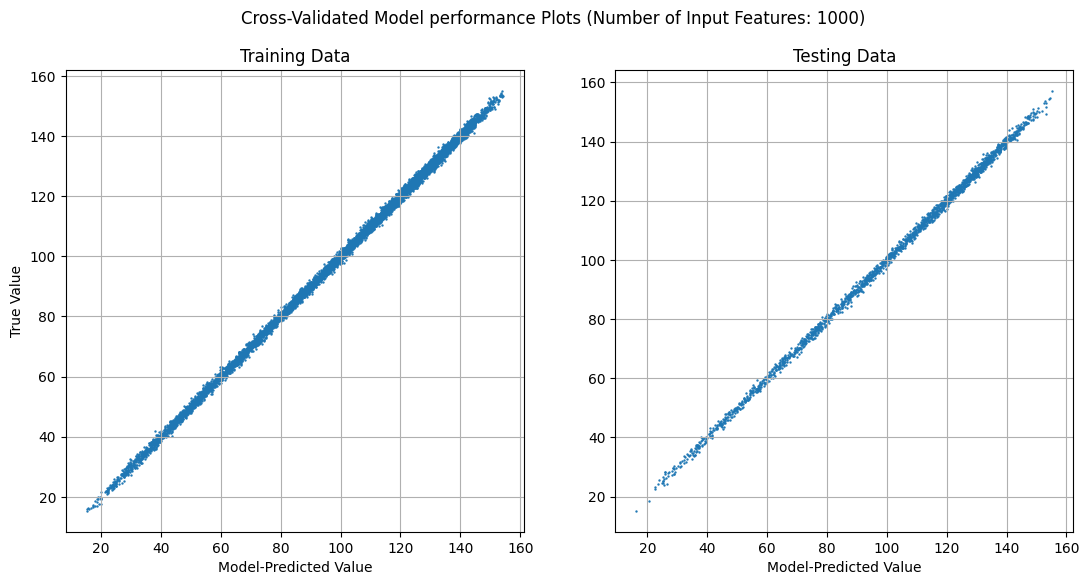

In [23]:
# Linear Regression with high-dimensional features 

# Defining a mean absolute error function
def MAE(Ytrue, Yhat):
    return np.sum(np.abs(Ytrue - Yhat)) / len(Yhat.ravel())

# Splitting into train and testing data
from sklearn.model_selection import train_test_split 
print("Splitting into train/test sets...")
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20, random_state = 42) # Set random state for repeatability

print("\nSolving for optimal beta...")
# Computing the time when the computation is started
start_time = datetime.now() 
# runs the linear solve 
beta = np.linalg.solve(Xtrain.T @ Xtrain,Xtrain.T @ Ytrain)
# Computes how long the computation took 
time_delta = datetime.now() - start_time

# Printing out how long the regression took to run 
print(f"The Linear Regression took {time_delta.total_seconds():.3f} seconds to compute\n")

print("\nMaking Model Predictions...")
# Making Model Predictions 
Yhat_train = Xtrain @ beta 
Yhat_test = Xtest @ beta 

print("\nComputing model performance...")
# Printing out the error metrics
print("Training MAE: ", MAE(Ytrain, Yhat_train))
print("Testing MAE:  ", MAE(Ytest, Yhat_test))

# Plotting train and test predictions 
plt.figure(figsize=(13,6))
plt.suptitle(f"Cross-Validated Model performance Plots (Number of Input Features: {Xtrain.shape[1]})")
plt.subplot(1,2,1)
plt.scatter(Yhat_train, Ytrain, s = 0.5)
plt.xlabel("Model-Predicted Value")
plt.ylabel("True Value")
plt.title("Training Data")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Yhat_test, Ytest, s = 0.5)
plt.xlabel("Model-Predicted Value")
plt.title("Testing Data")
plt.grid()

In [24]:
# Performing Principal Component Analysis on the Data 

# Take the mean of Xtrain and center Xtrain and Xtest
print("Centering Training/Testing Inputs...")
Xmean = np.mean(Xtrain, axis=0)
Xtrain = Xtrain - Xmean # Center training data to have mean-zero
Xtest  = Xtest  - Xmean # Center testing data to have mean-zero 


# Compute the covariance matrix of X 
print("\nComputing the Variance Matrix of Training Data...")
Xvar = (Xtrain.T @ Xtrain) / Xtrain.shape[0]

# Taking the SVD of the Covariance Matrix 
print("\nTaking the SVD of the Variance Matrix...")
U, S, _ = np.linalg.svd(Xvar)

# Defining which dimension we seek to project X down onto 
k = 50

# Taking the first k columns of U (eigenvectors/singular vectors of the covariance matrix)
Uk = U[:,:k]

# Projecting the training and testing data onto these components 
print("\nProjecting Training/Testing Inputs onto first k principle components...")
Xtrain = Xtrain @ Uk
Xtest = Xtest @ Uk

Centering Training/Testing Inputs...

Computing the Variance Matrix of Training Data...

Taking the SVD of the Variance Matrix...

Projecting Training/Testing Inputs onto first k principle components...



Solving for optimal beta...
The Linear Regression took 0.000 seconds to compute


Making Model Predictions...

Computing model performance...
Training MAE:  1.2912977331791229
Testing MAE:   1.2762781974708628


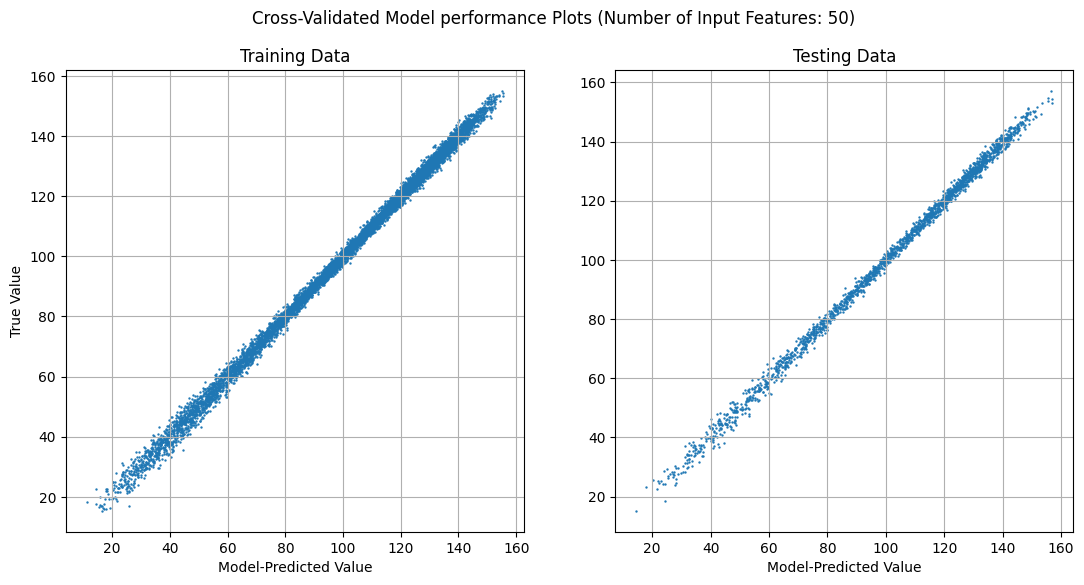

In [25]:
print("\nSolving for optimal beta...")
# Computing the time when the computation is started
start_time = datetime.now() 
# runs the linear solve 
beta = np.linalg.solve(Xtrain.T @ Xtrain,Xtrain.T @ Ytrain)
# Computes how long the computation took 
time_delta = datetime.now() - start_time

# Printing out how long the regression took to run 
print(f"The Linear Regression took {time_delta.total_seconds():.3f} seconds to compute\n")

print("\nMaking Model Predictions...")
# Making Model Predictions 
Yhat_train = Xtrain @ beta 
Yhat_test = Xtest @ beta 

print("\nComputing model performance...")
# Printing out the error metrics
print("Training MAE: ", MAE(Ytrain, Yhat_train))
print("Testing MAE:  ", MAE(Ytest, Yhat_test))

# Plotting train and test predictions 
plt.figure(figsize=(13,6))
plt.suptitle(f"Cross-Validated Model performance Plots (Number of Input Features: {Xtrain.shape[1]})")
plt.subplot(1,2,1)
plt.scatter(Yhat_train, Ytrain, s = 0.5)
plt.xlabel("Model-Predicted Value")
plt.ylabel("True Value")
plt.title("Training Data")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Yhat_test, Ytest, s = 0.5)
plt.xlabel("Model-Predicted Value")
plt.title("Testing Data")
plt.grid()